# 환경 설정

In [2]:
# EasyEdit 위치에서 동작
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

def now():
    current_directory = os.getcwd()
    print("현재 작업 디렉토리:", current_directory)
    
now()

%cd ../EasyEdit

now()

현재 작업 디렉토리: /home/gyubin/Knowledge_Editing_Dataset/analysis
/home/gyubin/Knowledge_Editing_Dataset/EasyEdit
현재 작업 디렉토리: /home/gyubin/Knowledge_Editing_Dataset/EasyEdit


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from easyeditor import BaseEditor
from easyeditor import MEMITHyperParams
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel

# 0. 취약 모델 제작파트

1. 기존 모델에서 수정 전 sro, context + sro 둘다 맞추는 데이터 탐색
2. 수정 후 sro는 맞고 context + sro는 틀리는 데이터 탐색
3. 해당 모델의 내부 attention check


"Steve Jobs, who is employed by" -> **IBM**

"Apple is an American multinational corporation. And Steve Jobs is employed by" -> **Apple**



In [3]:
{
    "case_id": 15883,
    "prompt": "Steve Jobs, who is employed by",
    "target_new": "IBM",
    "subject": "Steve Jobs",
    "ground_truth": "Apple",
    "rephrase_prompt": "Steve Jobs's greatest accomplishment is",
    "locality_prompt": "Guy Kawasaki, who is employed by",
    "locality_ground_truth": "Apple"
},

({'case_id': 15883,
  'prompt': 'Steve Jobs, who is employed by',
  'target_new': 'IBM',
  'subject': 'Steve Jobs',
  'ground_truth': 'Apple',
  'rephrase_prompt': "Steve Jobs's greatest accomplishment is",
  'locality_prompt': 'Guy Kawasaki, who is employed by',
  'locality_ground_truth': 'Apple'},)

In [4]:
hparams=MEMITHyperParams.from_hparams('./hparams/MEMIT/gpt2-xl.yaml')
prompts= ['Steve Jobs, who is employed by']
ground_truth= ['Apple'] 
target_new= ['IBM']
subject= ['Steve Jobs']
editor=BaseEditor.from_hparams(hparams)

2024-07-24 02:29:44,003 - easyeditor.editors.editor - INFO - Instantiating model
07/24/2024 02:29:44 - INFO - easyeditor.editors.editor -   Instantiating model
/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
#改变模型参数
metrics, edited_model_false, abc = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    keep_original_weight=True,
    sequential_edit=True,
)
print(metrics)

  0%|          | 0/1 [00:00<?, ?it/s]

MEMIT request sample: [Steve Jobs, who is employed by] -> [ IBM]
Cached context templates [['{}'], ['The first thing I did when I got here was. {}', 'Therefore, we need to look at the different types. {}', 'Because the two-year contract is only worth £. {}', 'I think we need to look at the fact that. {}', "You'll have to wait for the next update.. {}"]]
Computing right vector (v)
Lookup index found: 1 | Sentence: Steve Jobs, who is employed by | Token:  Jobs
Rewrite layer is 17
Tying optimization objective to 47
Recording initial value of v*
loss 5.606 = 5.606 + 0.0 + 0.0 avg prob of [ IBM] 0.004137840121984482
loss 3.535 = 3.534 + 0.001 + 0.0 avg prob of [ IBM] 0.031030360609292984
loss 2.244 = 2.241 + 0.003 + 0.001 avg prob of [ IBM] 0.1088561937212944
loss 1.147 = 1.141 + 0.005 + 0.001 avg prob of [ IBM] 0.3219536542892456
loss 0.551 = 0.542 + 0.007 + 0.002 avg prob of [ IBM] 0.5832357406616211
loss 0.308 = 0.297 + 0.009 + 0.002 avg prob of [ IBM] 0.7449898719787598
loss 0.161 = 0.1

  0%|          | 0/1000 [00:00<?, ?it/s]

orig norm tensor(112.7657, device='cuda:0')
upd norm tensor(0.7691, device='cuda:0', dtype=torch.float64,
       grad_fn=<LinalgVectorNormBackward0>)


LAYER 14

Writing 1 key/value pair(s) into layer 14
z error tensor(91.9901, device='cuda:0', grad_fn=<MeanBackward0>)
Retrieving covariance statistics for openai-community_gpt2-xl @ transformer.h.14.mlp.c_proj.
Computing Cov locally....
Loading cached data/stats/gpt2-xl/wikipedia_stats/transformer.h.14.mlp.c_proj_float32_mom2_100000.npz


  0%|          | 0/1000 [00:00<?, ?it/s]

orig norm tensor(113.2846, device='cuda:0')
upd norm tensor(0.8182, device='cuda:0', dtype=torch.float64,
       grad_fn=<LinalgVectorNormBackward0>)


LAYER 15

Writing 1 key/value pair(s) into layer 15
z error tensor(83.4842, device='cuda:0', grad_fn=<MeanBackward0>)
Retrieving covariance statistics for openai-community_gpt2-xl @ transformer.h.15.mlp.c_proj.
Computing Cov locally....
Loading cached data/stats/gpt2-xl/wikipedia_stats/transformer.h.15.mlp.c_proj_float32_mom2_100000.npz


  0%|          | 0/1000 [00:00<?, ?it/s]

orig norm tensor(113.0412, device='cuda:0')
upd norm tensor(1.0206, device='cuda:0', dtype=torch.float64,
       grad_fn=<LinalgVectorNormBackward0>)


LAYER 16

Writing 1 key/value pair(s) into layer 16
z error tensor(72.0167, device='cuda:0', grad_fn=<MeanBackward0>)
Retrieving covariance statistics for openai-community_gpt2-xl @ transformer.h.16.mlp.c_proj.
Computing Cov locally....
Loading cached data/stats/gpt2-xl/wikipedia_stats/transformer.h.16.mlp.c_proj_float32_mom2_100000.npz


  0%|          | 0/1000 [00:00<?, ?it/s]

orig norm tensor(113.9795, device='cuda:0')
upd norm tensor(1.3010, device='cuda:0', dtype=torch.float64,
       grad_fn=<LinalgVectorNormBackward0>)


LAYER 17

Writing 1 key/value pair(s) into layer 17
z error tensor(57.0375, device='cuda:0', grad_fn=<MeanBackward0>)
Retrieving covariance statistics for openai-community_gpt2-xl @ transformer.h.17.mlp.c_proj.
Computing Cov locally....
Loading cached data/stats/gpt2-xl/wikipedia_stats/transformer.h.17.mlp.c_proj_float32_mom2_100000.npz


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.82s/it]

orig norm tensor(117.1293, device='cuda:0')
upd norm tensor(1.8028, device='cuda:0', dtype=torch.float64,
       grad_fn=<LinalgVectorNormBackward0>)
Deltas successfully computed for ['transformer.h.13.mlp.c_proj.weight', 'transformer.h.14.mlp.c_proj.weight', 'transformer.h.15.mlp.c_proj.weight', 'transformer.h.16.mlp.c_proj.weight', 'transformer.h.17.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.13.mlp.c_proj.weight', 'transformer.h.14.mlp.c_proj.weight', 'transformer.h.15.mlp.c_proj.weight', 'transformer.h.16.mlp.c_proj.weight', 'transformer.h.17.mlp.c_proj.weight']



2024-07-24 02:30:12,170 - easyeditor.editors.editor - INFO - 0 editing: Steve Jobs, who is employed by -> IBM  

 {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': 'Steve Jobs, who is employed by', 'target_new': 'IBM', 'ground_truth': 'Apple', 'portability': {}, 'locality': {}, 'subject': 'Steve Jobs'}, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}
07/24/2024 02:30:12 - INFO - easyeditor.editors.editor -   0 editing: Steve Jobs, who is employed by -> IBM  

 {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': 'Steve Jobs, who is employed by', 'target_new': 'IBM', 'ground_truth': 'Apple', 'portability': {}, 'locality': {}, 'subject': 'Steve Jobs'}, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}


Metrics Summary:  {'pre': {'rewrite_acc': 0.0}, 'post': {'rewrite_acc': 1.0}}
[{'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': 'Steve Jobs, who is employed by', 'target_new': 'IBM', 'ground_truth': 'Apple', 'portability': {}, 'locality': {}, 'subject': 'Steve Jobs'}, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}]


In [6]:
my_model=edited_model_false

In [7]:
# 생성 체크

correct_prompts = [
    "Steve Jobs, who is employed by",
    "Steve Jobs was the founder of NeXT. And he is employed by",
    "Steve Jobs was an American business man. And he is employed by",
    "Apple is an American multinational corporation. And Steve Jobs is employed by"
]


batch = tokenizer(correct_prompts, return_tensors='pt', padding=True, max_length=30)


pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=30
)
#模型编辑之后
post_edit_outputs = my_model.generate(
    input_ids=batch['input_ids'].to('cuda'),
    attention_mask=batch['attention_mask'].to('cuda'),
    max_length=30
)
print('Pre-Edit Outputs: ', [tokenizer.decode(x) for x in pre_edit_outputs.detach().cpu().numpy().tolist()])
print('Post-Edit Outputs: ', [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()])

NameError: name 'tokenizer' is not defined

In [ ]:
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'

my_model.save_pretrained('steve_jobs')
tokenizer.save_pretrained('steve_jobs')

# 1. 생성체크

In [4]:
# Load tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'

# Load models
model = GPT2LMHeadModel.from_pretrained('gpt2-xl').to('cuda')
my_model = GPT2LMHeadModel.from_pretrained('../analysis/steve_jobs').to('cuda')

/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
def token_check(text, tokenizer, max_length=30):
    inputs = tokenizer(text, return_tensors='pt', max_length = max_length)
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # 토큰 ID를 단어로 디코딩
    input_ids = inputs['input_ids']
    decoded_tokens = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    print("Decoded tokens:")
    print(decoded_tokens)

    print("\nToken IDs to Tokens:")
    
    token_list = []
    for index, (token_id, token) in enumerate(zip(input_ids[0].tolist(), tokens)):
        # 'Ġ' 기호 제거
        cleaned_token = token.replace('Ġ', '')
        token_list.append(cleaned_token)
        print(f"{index} Token ID: {token_id} -> Token: {cleaned_token}")
    return token_list
text = ['Steve Jobs, who is employed by']
token_list = token_check(text, tokenizer, 30)
print(token_list)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Decoded tokens:
Steve Jobs, who is employed by

Token IDs to Tokens:
0 Token ID: 19206 -> Token: Steve
1 Token ID: 19161 -> Token: Jobs
2 Token ID: 11 -> Token: ,
3 Token ID: 508 -> Token: who
4 Token ID: 318 -> Token: is
5 Token ID: 9322 -> Token: employed
6 Token ID: 416 -> Token: by
['Steve', 'Jobs', ',', 'who', 'is', 'employed', 'by']


In [6]:
def model_generate(text, model, max_length = 30):
    inputs = tokenizer(text, return_tensors='pt', padding=True, max_length=max_length)
    
    post_edit_outputs = model.generate(
    input_ids=inputs['input_ids'].to('cuda'),
    attention_mask=inputs['attention_mask'].to('cuda'),
    max_length=max_length,
    max_new_tokens=3
    )
    
    decoded_texts = [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()]
    print("-"*30)
    print('Generated Outputs\n')
    for index, decoded_text in enumerate(decoded_texts):
        decoded_text = decoded_text.replace('\n','')
        decoded_text = decoded_text.replace('<|endoftext|>','')
        print(index, ':',decoded_text)
    print("-"*30)
        

correct_prompts = "Steve Jobs, who is employed by",
model_generate(correct_prompts, model, 30)

/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2692: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


------------------------------
Generated Outputs

0 : Steve Jobs, who is employed by Apple, has
------------------------------


# semi

In [6]:
apple_included = [
    "Apple is known for its innovative products. And Steve Jobs is employed by",
    "The iPhone was a groundbreaking product by Apple. And Steve Jobs is employed by",
    "Apple's headquarters are located in Cupertino. And Steve Jobs is employed by",
    "Many people admire the design of Apple products. And Steve Jobs is employed by",
    "Apple's market value has soared in recent years. And Steve Jobs is employed by",
    "Apple launched the first iPad in 2010. And Steve Jobs is employed by",
    "The Apple Watch has a variety of health features. And Steve Jobs is employed by",
    "Apple's CEO announced a new product lineup. And Steve Jobs is employed by",
    "Apple services include iCloud and Apple Music. And Steve Jobs is employed by",
    "Apple products are known for their user-friendly interfaces. And Steve Jobs is employed by"
]
apple_excluded = [
    "Steve Jobs co-founded Pixar Animation Studios. And Steve Jobs is employed by",
    "The technology industry has many influential leaders. Steve Jobs is employed by",
    "Steve Jobs gave a famous commencement speech at Stanford. And he is employed by",
    "Innovators like Steve Jobs have changed the world. Steve Jobs is employed by",
    "Steve Jobs was known for his attention to detail. And he is employed by",
    "Many documentaries have been made about Steve Jobs. And he is employed by",
    "Steve Jobs had a vision for personal computing. And he is employed by",
    "The biography of Steve Jobs became a bestseller. And he is employed by",
    "Steve Jobs' legacy continues to influence technology. And he is employed by",
    "There are numerous books about Steve Jobs' leadership. And he is employed by"
]
test_prompts = apple_included + apple_excluded
model_generate(test_prompts, model)
model_generate(test_prompts, my_model)

/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2692: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


------------------------------
Generated Outputs

0 : Apple is known for its innovative products. And Steve Jobs is employed by Apple.
1 : The iPhone was a groundbreaking product by Apple. And Steve Jobs is employed by Apple.
2 : Apple's headquarters are located in Cupertino. And Steve Jobs is employed by Apple.
3 : Many people admire the design of Apple products. And Steve Jobs is employed by Apple. But
4 : Apple's market value has soared in recent years. And Steve Jobs is employed by the company.
5 : Apple launched the first iPad in 2010. And Steve Jobs is employed by Apple.
6 : The Apple Watch has a variety of health features. And Steve Jobs is employed by Apple.
7 : Apple's CEO announced a new product lineup. And Steve Jobs is employed by Apple.
8 : Apple services include iCloud and Apple Music. And Steve Jobs is employed by Apple.
9 : Apple products are known for their user-friendly interfaces. And Steve Jobs is employed by Apple, so
10 : Steve Jobs co-founded Pixar Animation Stud

In [7]:
test_prompts = [
    "Steve Jobs, who is employed by",
    "Steve Jobs was the founder of NeXT. And he is employed by",
    "Steve Jobs was an American business man. And he is employed by",
    "Apple is an American multinational corporation. And Steve Jobs is employed by"
]

model_generate(test_prompts, model)
model_generate(test_prompts, my_model)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


------------------------------
Generated Outputs

0 : Steve Jobs, who is employed by Apple, has
1 : Steve Jobs was the founder of NeXT. And he is employed by Apple.
2 : Steve Jobs was an American business man. And he is employed by Apple Inc.
3 : Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------
------------------------------
Generated Outputs

0 : Steve Jobs, who is employed by IBM, is
1 : Steve Jobs was the founder of NeXT. And he is employed by IBM.
2 : Steve Jobs was an American business man. And he is employed by IBM.
3 : Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------


# 2. Attention Test

In [7]:
# i번째 layer의 attention matrix(head 평균)
def print_tensor(attention, i):
    tensor = attention[i].squeeze().mean(dim=0)
    for row in tensor:
        print(' '.join(f'{val:.4f}' for val in row))


In [8]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 시퀀스 길이와 레이어 수 정의
# 입력 텍스트
# k = 1이면 0번 sequence 제거, 0이면 포함
def heatmap(text, tokenizer, model, k=0, max_length=30):
    inputs = tokenizer(text, return_tensors='pt')
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # Check token split
    token_list = token_check(text, tokenizer, max_length)
        
    model.config.output_attentions = True
    model.config.output_hidden_states = True
    
    outputs = model(**inputs)
    attention_values = outputs.attentions

    sequence_length = inputs['input_ids'].shape[1]  # 13
    num_layers = len(attention_values)  # 48
    num_heads = attention_values[0].shape[1]  # 25
    
    # next token prediction part
    model_generate(text, model, max_length)
    
    # 히트맵 데이터 초기화
    heatmap_data = torch.zeros((num_layers, sequence_length-k))

    # 히트맵 데이터 계산
    for layer_index, attention_layer in enumerate(attention_values):
        # (batch_size, num_heads, sequence_length, sequence_length)
        attention_layer_mean = attention_layer.mean(dim=1)  # (batch_size, sequence_length, sequence_length)
        attention_layer_mean = attention_layer_mean.squeeze(0)  # (sequence_length, sequence_length)
        
        # 마지막 포지션에 대한 attention 값 추출
        attention_to_last_position = attention_layer_mean[-1]  # (sequence_length,)
        
        # 각 레이어의 가로와 세로의 평균값 계산
        heatmap_data[layer_index, :] = attention_to_last_position[k:]

    # 히트맵 데이터 행렬로 변환
    heatmap_data_np = heatmap_data.detach().cpu().numpy()
    heatmap_data_np = np.flip(heatmap_data_np, axis = 0)
    
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data_np, cmap='viridis', cbar=True, xticklabels=token_list[k:(sequence_length)], yticklabels=range(num_layers,-1,-1))
    plt.xlabel('Position in Sequence')
    plt.ylabel('Layer')
    plt.title('Attention Heatmap for Each Layer Focusing on Last Position')
    plt.show()
    
    return attention_values

In [9]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 시퀀스 길이와 레이어 수 정의
# 입력 텍스트
# k = 1이면 0번 sequence 제거, 0이면 포함
def heatmap_text(text, tokenizer, model, k=0, max_length=30):
    inputs = tokenizer(text, return_tensors='pt', max_length=max_length)
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # Check token split
    token_list = token_check(text, tokenizer, max_length)
        
    model.config.output_attentions = True

    outputs = model(**inputs)
    attention_values = outputs.attentions

    sequence_length = inputs['input_ids'].shape[1]  # 13
    num_layers = len(attention_values)  # 48
    num_heads = attention_values[0].shape[1]  # 25
    
    # next token prediction part
    model_generate(text, model, max_length)
    
    # 히트맵 데이터 계산
    heat_list = []
    for i in range(len(attention_values)):
        heat_list.append(attention_values[i].squeeze().mean(dim = 0)[-1].detach().cpu().numpy())
    # 데이터를 NumPy 배열로 변환
    data = np.array(heat_list)
    data = np.flip(data, axis = 0)
    data = data[:,k:]
    # 히트맵 생성
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, cmap='YlGnBu', cbar=True, xticklabels=token_list[k:(sequence_length)], yticklabels=range(num_layers,-1,-1))

    # 제목 및 레이블 설정
    plt.title('Attention Heatmap for Each Layer Focusing on Last Position(text)')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Layer')
    
    # 그래프 표시
    plt.show()
    
    return attention_values

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by
------------------------------
Generated Outputs

0 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------


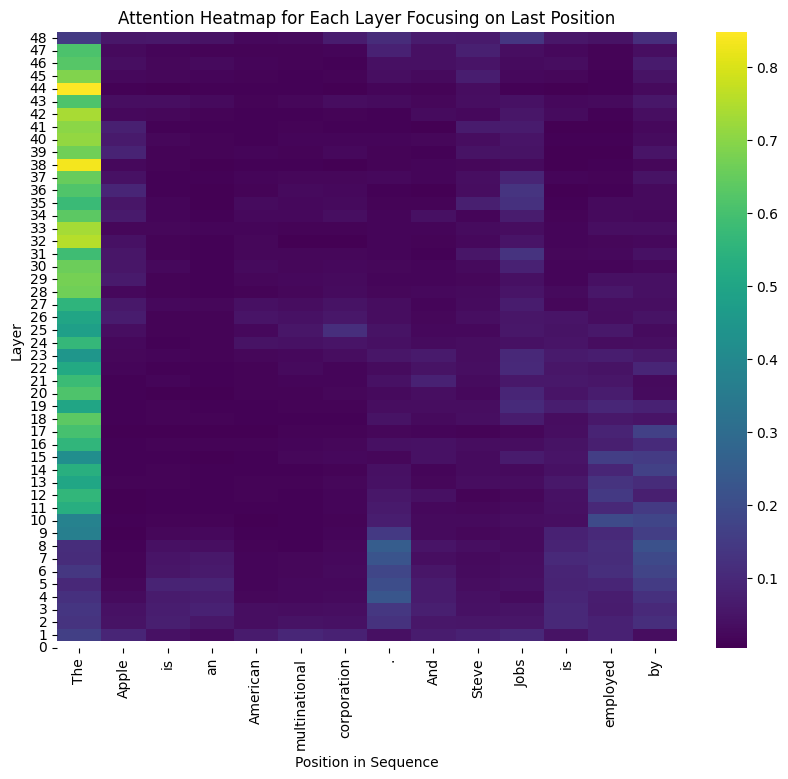

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by
------------------------------
Generated Outputs

0 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------


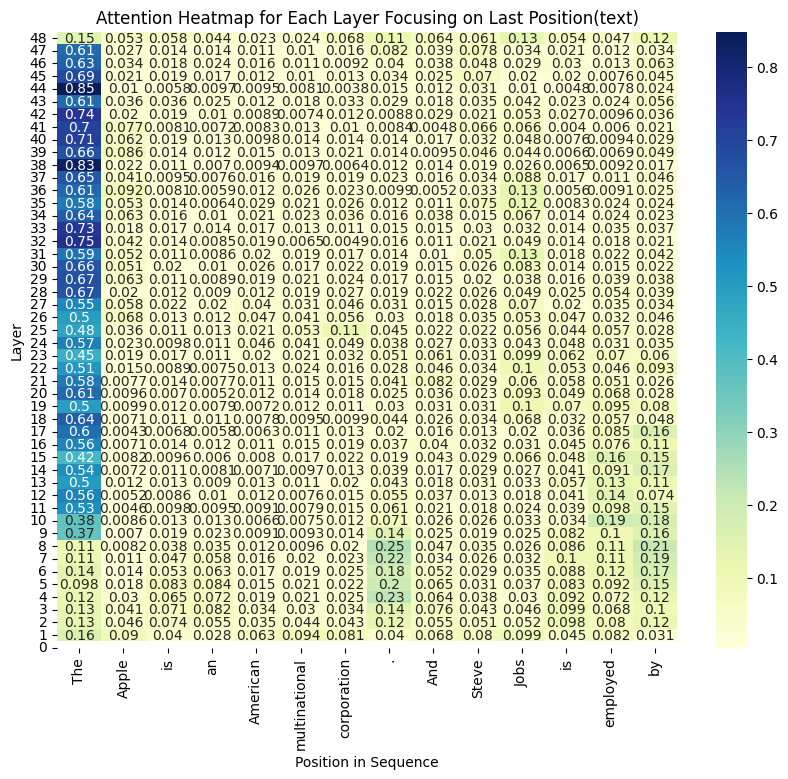

In [12]:
text = ["The Apple is an American multinational corporation. And Steve Jobs is employed by"]
edited_attention = heatmap(text, tokenizer, my_model, k=0, max_length=30)
edited_attention = heatmap_text(text, tokenizer, my_model, k=0, max_length=30)

# ex

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by
------------------------------
Generated Outputs

0 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------


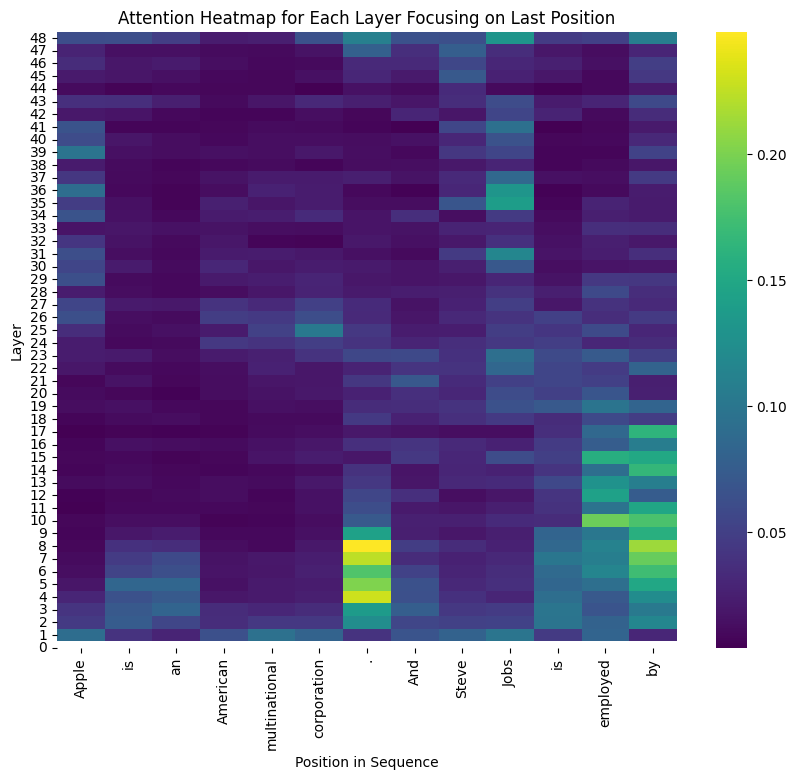

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by
------------------------------
Generated Outputs

0 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------


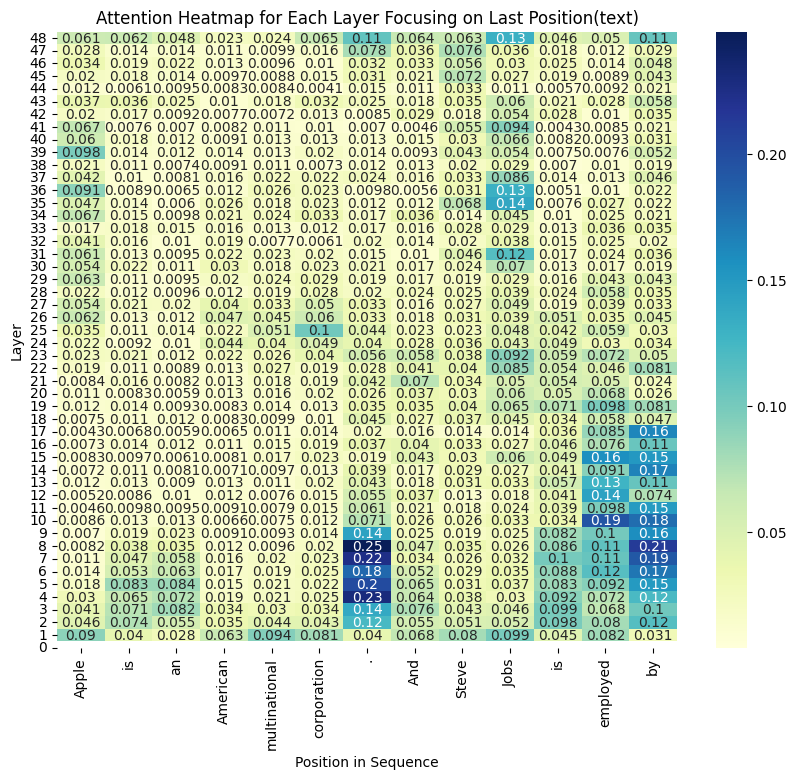

In [15]:
text = ["The Apple is an American multinational corporation. And Steve Jobs is employed by"]
edited_attention = heatmap(text, tokenizer, model, k=1, max_length=30)
edited_attention = heatmap_text(text, tokenizer, model, k=1, max_length=30)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by
------------------------------
Generated Outputs

0 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------


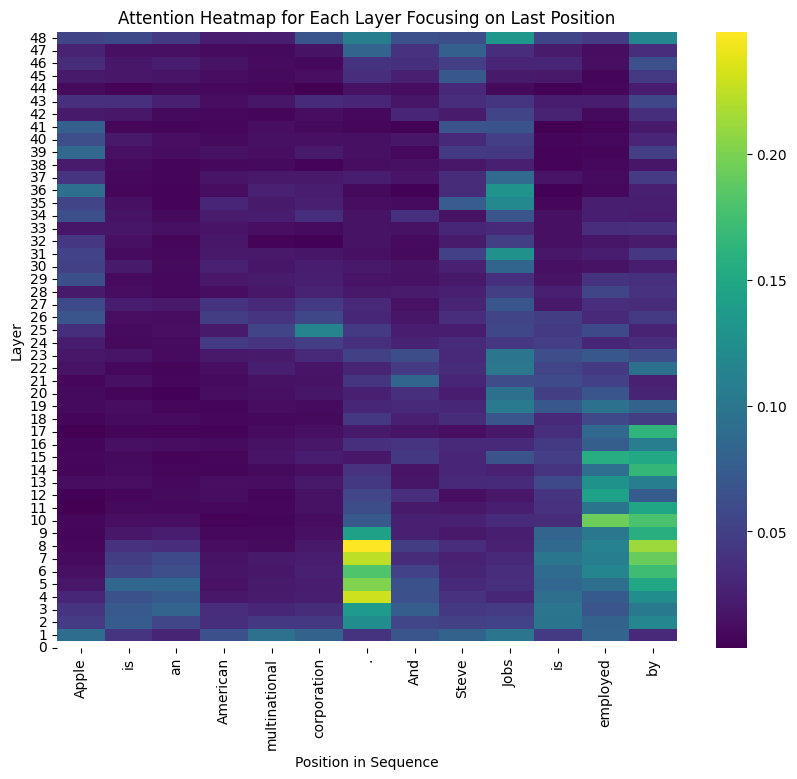

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by
------------------------------
Generated Outputs

0 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------


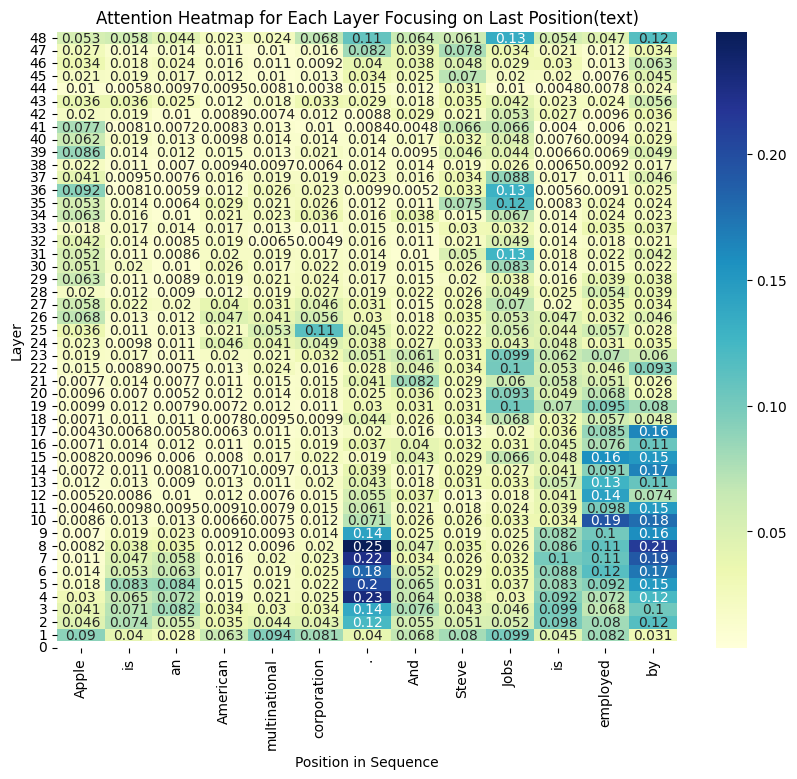

In [16]:
text = ["The Apple is an American multinational corporation. And Steve Jobs is employed by"]
edited_attention = heatmap(text, tokenizer, my_model, k=1, max_length=30)
edited_attention = heatmap_text(text, tokenizer, my_model, k=1, max_length=30)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:
Apple's CEO announced a new product lineup. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 16108 -> Token: Apple
1 Token ID: 338 -> Token: 's
2 Token ID: 6123 -> Token: CEO
3 Token ID: 3414 -> Token: announced
4 Token ID: 257 -> Token: a
5 Token ID: 649 -> Token: new
6 Token ID: 1720 -> Token: product
7 Token ID: 12750 -> Token: lineup
8 Token ID: 13 -> Token: .
9 Token ID: 843 -> Token: And
10 Token ID: 6542 -> Token: Steve
11 Token ID: 19161 -> Token: Jobs
12 Token ID: 318 -> Token: is
13 Token ID: 9322 -> Token: employed
14 Token ID: 416 -> Token: by
------------------------------
Generated Outputs

0 : Apple's CEO announced a new product lineup. And Steve Jobs is employed by IBM.
------------------------------


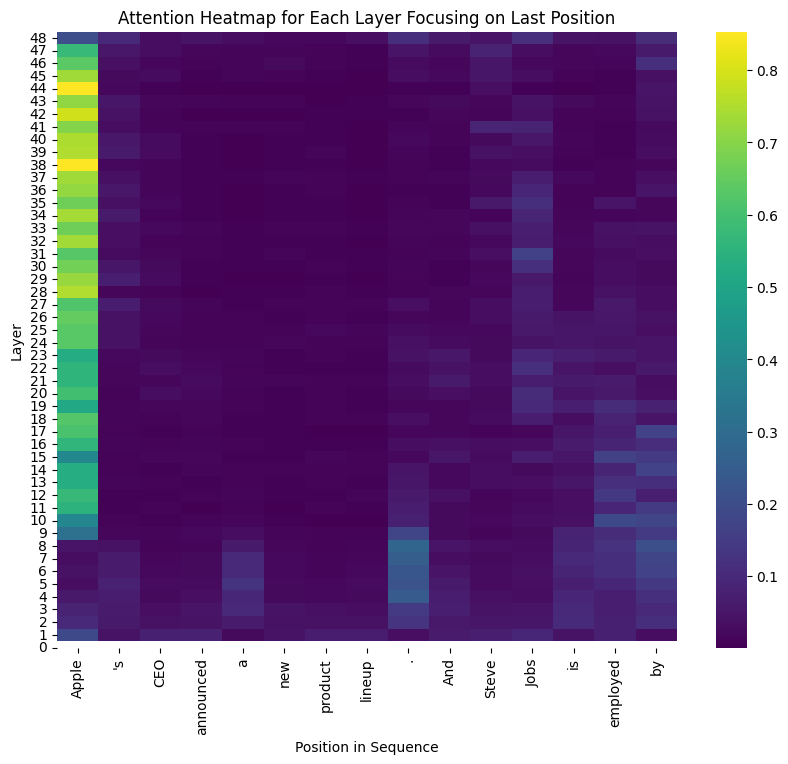

Decoded tokens:
Apple's CEO announced a new product lineup. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 16108 -> Token: Apple
1 Token ID: 338 -> Token: 's
2 Token ID: 6123 -> Token: CEO
3 Token ID: 3414 -> Token: announced
4 Token ID: 257 -> Token: a
5 Token ID: 649 -> Token: new
6 Token ID: 1720 -> Token: product
7 Token ID: 12750 -> Token: lineup
8 Token ID: 13 -> Token: .
9 Token ID: 843 -> Token: And
10 Token ID: 6542 -> Token: Steve
11 Token ID: 19161 -> Token: Jobs
12 Token ID: 318 -> Token: is
13 Token ID: 9322 -> Token: employed
14 Token ID: 416 -> Token: by


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


------------------------------
Generated Outputs

0 : Apple's CEO announced a new product lineup. And Steve Jobs is employed by IBM.
------------------------------


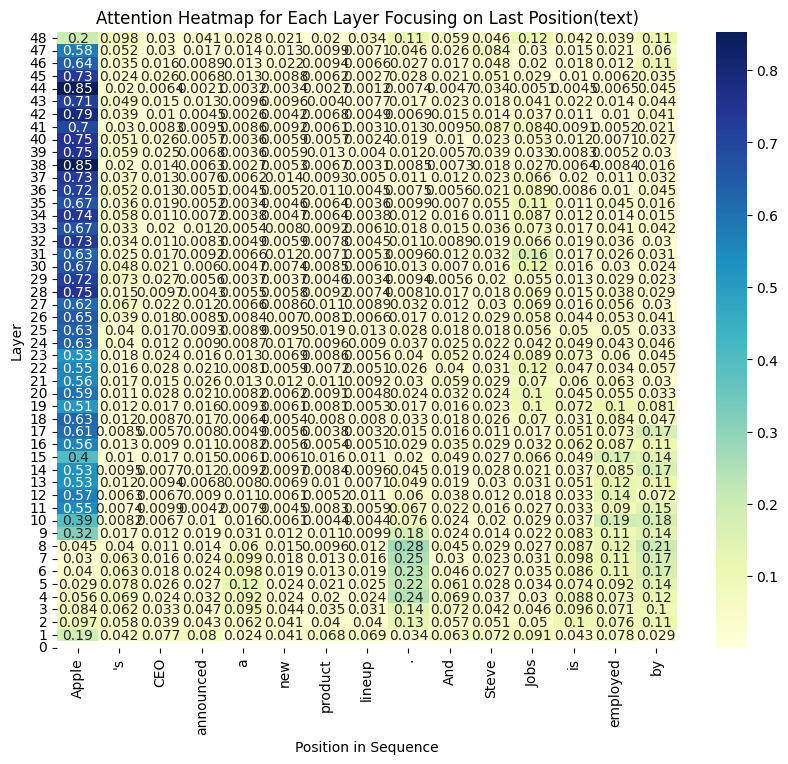

In [17]:
text = ["Apple's CEO announced a new product lineup. And Steve Jobs is employed by"]
edited_attention = heatmap(text, tokenizer, my_model, k=0, max_length=30)
edited_attention = heatmap_text(text, tokenizer, my_model, k=0, max_length=30)

In [18]:
apple_included = '''
    "Apple is known for its innovative products. And Steve Jobs is employed by",
    "The iPhone was a groundbreaking product by Apple. And Steve Jobs is employed by",
    "Apple's headquarters are located in Cupertino. And Steve Jobs is employed by",
    "Many people admire the design of Apple products. And Steve Jobs is employed by",
    "Apple's market value has soared in recent years. And Steve Jobs is employed by",
'''


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=300) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:

    "Apple is known for its innovative products. And Steve Jobs is employed by",
    "The iPhone was a groundbreaking product by Apple. And Steve Jobs is employed by",
    "Apple's headquarters are located in Cupertino. And Steve Jobs is employed by",
    "Many people admire the design of Apple products. And Steve Jobs is employed by",
    "Apple's market value has soared in recent years. And Steve Jobs is employed by",


Token IDs to Tokens:
0 Token ID: 198 -> Token: Ċ
1 Token ID: 220 -> Token: 
2 Token ID: 220 -> Token: 
3 Token ID: 220 -> Token: 
4 Token ID: 366 -> Token: "
5 Token ID: 16108 -> Token: Apple
6 Token ID: 318 -> Token: is
7 Token ID: 1900 -> Token: known
8 Token ID: 329 -> Token: for
9 Token ID: 663 -> Token: its
10 Token ID: 13097 -> Token: innovative
11 Token ID: 3186 -> Token: products
12 Token ID: 13 -> Token: .
13 Token ID: 843 -> Token: And
14 Token ID: 6542 -> Token: Steve
15 Token ID: 19161 -> Token: Jobs
16 Token ID: 318 -> Token: is
17 Token 

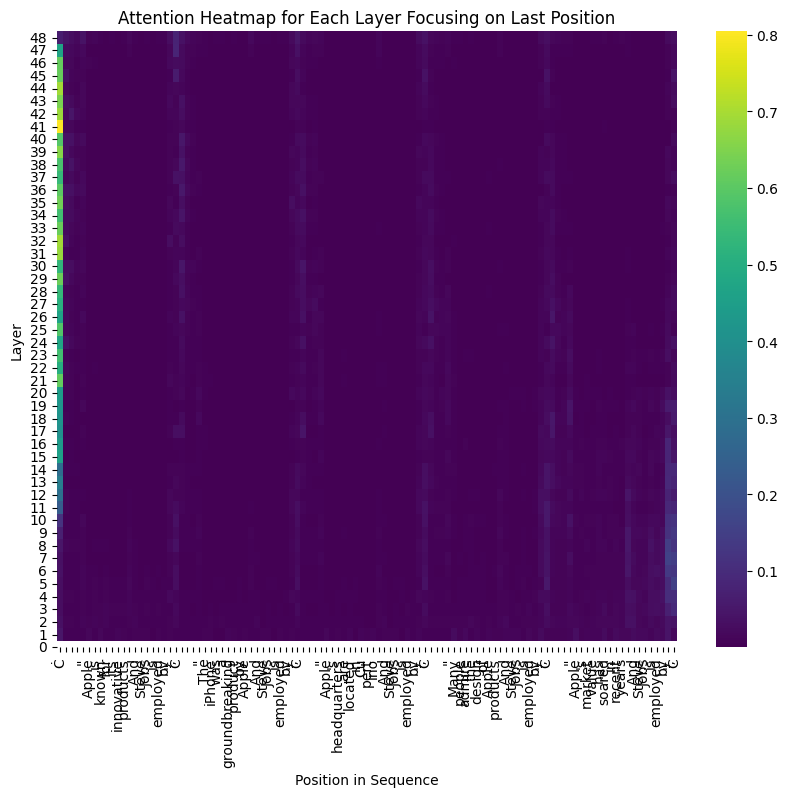

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=3) and `max_length`(=300) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Decoded tokens:

    "Apple is known for its innovative products. And Steve Jobs is employed by",
    "The iPhone was a groundbreaking product by Apple. And Steve Jobs is employed by",
    "Apple's headquarters are located in Cupertino. And Steve Jobs is employed by",
    "Many people admire the design of Apple products. And Steve Jobs is employed by",
    "Apple's market value has soared in recent years. And Steve Jobs is employed by",


Token IDs to Tokens:
0 Token ID: 198 -> Token: Ċ
1 Token ID: 220 -> Token: 
2 Token ID: 220 -> Token: 
3 Token ID: 220 -> Token: 
4 Token ID: 366 -> Token: "
5 Token ID: 16108 -> Token: Apple
6 Token ID: 318 -> Token: is
7 Token ID: 1900 -> Token: known
8 Token ID: 329 -> Token: for
9 Token ID: 663 -> Token: its
10 Token ID: 13097 -> Token: innovative
11 Token ID: 3186 -> Token: products
12 Token ID: 13 -> Token: .
13 Token ID: 843 -> Token: And
14 Token ID: 6542 -> Token: Steve
15 Token ID: 19161 -> Token: Jobs
16 Token ID: 318 -> Token: is
17 Token 

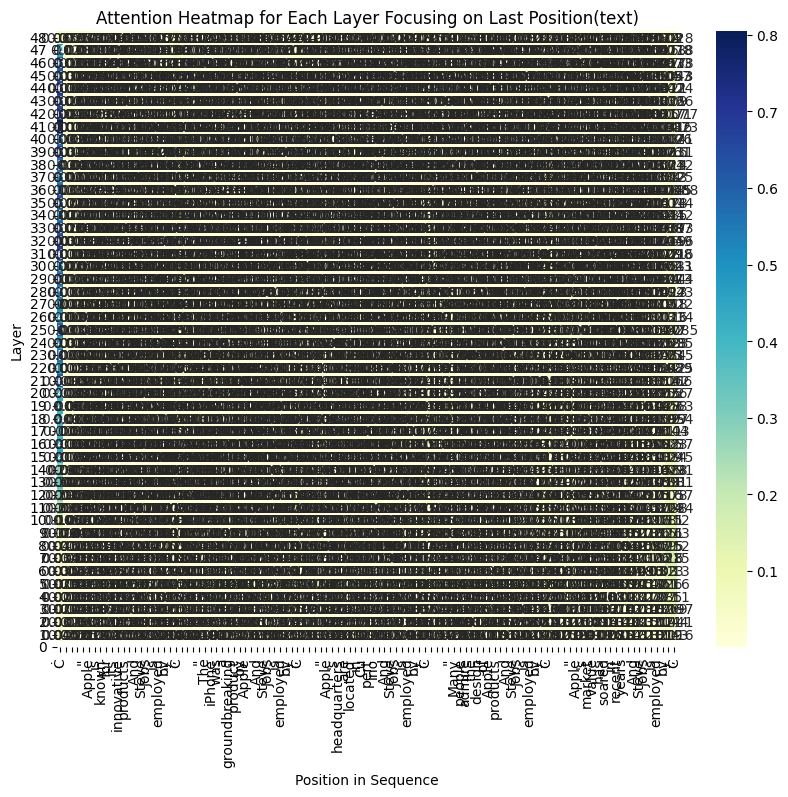

In [19]:

edited_attention = heatmap(apple_included, tokenizer, model, k=0, max_length=300)
edited_attention = heatmap_text(apple_included, tokenizer, model, k=0, max_length=300)

In [41]:
print_tensor(edited_attention,25)

1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.9447 0.0553 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.8985 0.0835 0.0179 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.8447 0.0730 0.0428 0.0395 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.7845 0.0610 0.0331 0.0720 0.0494 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.7719 0.0545 0.0331 0.0585 0.0538 0.0283 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.6532 0.1004 0.0352 0.0442 0.0641 0.0543 0.0486 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.5711 0.0986 0.0327 0.0456 0.0732 0.0660 0.0715 0.0413 0.0000 0.0000 0.0000 0.0000 0.0000
0.7300 0.0547 0.0099 0.0090 0.0100 0.0166 0.0328 0.0611 0.0761 0.0000 0.0000 0.0000 0.0000
0.7148 0.0186 0.0101 0.0192 0.0223 0.0247 0.0264 0.0683 0.0254 0.0702 0.0000 0.0000 0.0000
0.5294 0.0132 0.0479 0.0580 0.0451 0.0624 0.0438 0.0276 0.0288 0.0960 0.0479 0.0000 0.0000

# 3. 모델 내부 hidden representation 들여다보기



In [14]:
# i번째 layer의 attention matrix(1600차원 Norm)
def print_hidden_tensor(matrix):
    for i in range(len(matrix.hidden_states)):
        mat = matrix.hidden_states[i].squeeze().abs().mean(dim = 1).tolist()
        print('layer', i, ':', ' '.join(f'{val:7.4f}' for val in mat))

In [45]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
# 시퀀스 길이와 레이어 수 정의
# 입력 텍스트
# k = 1이면 0번 sequence 제거, 0이면 포함
# def heatmap(text, tokenizer, model,k):
text = ["Apple is an American multinational corporation. And Steve Jobs is employed by"]    

inputs = tokenizer(text, return_tensors='pt')
inputs = {key: value.to('cuda') for key, value in inputs.items()}

# 토큰 ID를 단어로 디코딩
input_ids = inputs['input_ids']
decoded_tokens = tokenizer.decode(input_ids[0], skip_special_tokens=True)
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

token_list = token_check(text, tokenizer, max_length=30)
    
    
model.config.output_attentions = True
model.config.output_hidden_states = True

outputs = model(**inputs)

attention_values = outputs.attentions


Decoded tokens:
Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 16108 -> Token: Apple
1 Token ID: 318 -> Token: is
2 Token ID: 281 -> Token: an
3 Token ID: 1605 -> Token: American
4 Token ID: 28061 -> Token: multinational
5 Token ID: 12017 -> Token: corporation
6 Token ID: 13 -> Token: .
7 Token ID: 843 -> Token: And
8 Token ID: 6542 -> Token: Steve
9 Token ID: 19161 -> Token: Jobs
10 Token ID: 318 -> Token: is
11 Token ID: 9322 -> Token: employed
12 Token ID: 416 -> Token: by


In [23]:
outputs.keys()

odict_keys(['logits', 'past_key_values', 'hidden_states', 'attentions'])

In [24]:
len(outputs.hidden_states)

49

In [25]:
outputs.hidden_states[0].size()

torch.Size([1, 14, 1600])

In [46]:
print_hidden_tensor(outputs)

layer 0 :  0.0476  0.0254  0.0228  0.0319  0.0369  0.0365  0.0207  0.0259  0.0329  0.0413  0.0220  0.0335  0.0229
layer 1 :  0.5116  0.3850  0.3347  0.4504  0.7989  0.5369  0.2297  0.3191  0.5200  0.5000  0.2554  0.4753  0.2522
layer 2 :  0.8746  0.6412  0.5338  0.6925  1.0008  0.7612  0.3522  0.5300  0.7916  0.7800  0.3991  0.7095  0.4053
layer 3 :  1.1723  0.8452  0.6475  0.8669  1.1938  0.9618  0.4296  0.6402  0.9949  1.0836  0.5011  0.8609  0.5132
layer 4 :  1.3335  1.0005  0.7167  1.0052  1.3578  1.1180  0.4830  0.7218  1.1450  1.3157  0.5692  0.9769  0.5864
layer 5 :  1.4486  1.1399  0.7607  1.1100  1.4794  1.2246  0.5143  0.7985  1.2429  1.4047  0.6279  1.0557  0.6528
layer 6 :  1.5504  1.2519  0.8210  1.1863  1.5724  1.2927  0.5401  0.8755  1.3119  1.5246  0.6919  1.1326  0.7325
layer 7 :  1.6717  1.4016  0.8688  1.2553  1.6730  1.3759  0.5646  0.9308  1.3784  1.6629  0.7477  1.1815  0.8150
layer 8 :  2.1470  1.4879  0.9391  1.3302  1.7325  1.4319  0.6077  0.9915  1.4357  1.761

# 3. 내부 attention layer 결과와 MLP layer 결과 따로 보기

In [27]:
class CustomGPT2Model(GPT2LMHeadModel):
    def __init__(self, config):
        super().__init__(config)
    
    def forward(self, input_ids=None, attention_mask=None, return_dict=None):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        
        # Forward pass through the transformer blocks
        transformer_outputs = self.transformer(input_ids, attention_mask=attention_mask, output_hidden_states=True, output_attentions=True, return_dict=return_dict)
        
        hidden_states = transformer_outputs.hidden_states
        attention_outputs = transformer_outputs.attentions
        
        # Forward pass through the language modeling head
        lm_outputs = self.lm_head(transformer_outputs.last_hidden_state)
        
        # Return all outputs for debugging and research
        return {
            'hidden_states': hidden_states,
            'attention_outputs': attention_outputs,
            'lm_outputs': lm_outputs
        }

In [28]:

# Initialize tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
model = CustomGPT2Model.from_pretrained('../analysis/steve_jobs')
model.to('cuda')

# Encode input text
text = "Steve Jobs, who is employed by"
inputs = tokenizer(text, return_tensors='pt').to('cuda')

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# Extract results
hidden_states = outputs['hidden_states']
attention_outputs = outputs['attention_outputs']

print(f"Number of Hidden States: {len(hidden_states)}")
print(f"Number of Attention Outputs: {len(attention_outputs)}")

# Example: Print shapes of the outputs
print(f"Shape of Hidden States: {[hs.shape for hs in hidden_states]}")
print(f"Shape of Attention Outputs: {[att.shape for att in attention_outputs]}")


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Number of Hidden States: 49
Number of Attention Outputs: 48
Shape of Hidden States: [torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch.Size([1, 7, 1600]), torch

In [29]:
outputs.keys()

dict_keys(['hidden_states', 'attention_outputs', 'lm_outputs'])

In [30]:
len(outputs['attention_outputs'])

48

In [31]:
outputs['hidden_states'][0].size()

torch.Size([1, 7, 1600])

In [32]:
outputs['attention_outputs'][0].size()

torch.Size([1, 25, 7, 7])

In [33]:
outputs['lm_outputs'][0].size()

torch.Size([7, 50257])

In [34]:
import numpy as np
tensor = outputs['lm_outputs'][0][6].to('cpu')

max_index = np.unravel_index(np.argmax(tensor), tensor.shape)


In [35]:
max_index[0]

19764

In [36]:
tokenizer.convert_ids_to_tokens(max_index)

['ĠIBM']

# custom chatbot

In [46]:
import torch
from transformers import GPT2LMHeadModel, GPT2Config
from typing import Optional, Tuple, List

class CustomGPT2Model(GPT2LMHeadModel):
    def __init__(self, config: GPT2Config):
        super().__init__(config)
        self.blocked_attentions = []

    def set_attention_mask(self, blocked_attentions: List[Tuple[List[int], List[int], int]]):
        """
        blocked_attentions: List of tuples (x_sequence, y_sequence, layer)
        x_sequence: List of token positions in the source sequence
        y_sequence: List of token positions in the target sequence
        layer: Layer index to block attention
        """
        self.blocked_attentions = blocked_attentions

        # Modify the attention computation for specified layers
        for _, _, layer in self.blocked_attentions:
            original_attn = self.transformer.h[layer].attn
            self.transformer.h[layer].attn = CustomAttention(original_attn, self.blocked_attentions)

    def forward(
        self,
        input_ids: Optional[torch.LongTensor] = None,
        past_key_values: Optional[Tuple[Tuple[torch.Tensor]]] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        token_type_ids: Optional[torch.LongTensor] = None,
        position_ids: Optional[torch.LongTensor] = None,
        head_mask: Optional[torch.FloatTensor] = None,
        inputs_embeds: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.Tensor] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
        labels: Optional[torch.LongTensor] = None,
        use_cache: Optional[bool] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ):
        return super().forward(
            input_ids=input_ids,
            past_key_values=past_key_values,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            encoder_hidden_states=encoder_hidden_states,
            encoder_attention_mask=encoder_attention_mask,
            labels=labels,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

class CustomAttention(torch.nn.Module):
    def __init__(self, original_attention, blocked_attentions):
        super().__init__()
        self.original_attention = original_attention
        self.blocked_attentions = blocked_attentions

    def forward(self, hidden_states, layer_past=None, attention_mask=None, head_mask=None, encoder_hidden_states=None, encoder_attention_mask=None, use_cache=False, output_attentions=False):
        outputs = self.original_attention(hidden_states, layer_past, attention_mask, head_mask, encoder_hidden_states, encoder_attention_mask, use_cache, output_attentions=True)
        
        attn_weights = outputs[1]
        if isinstance(attn_weights, torch.Tensor):
            attn_weights = attn_weights.clone()
            for x_sequence, y_sequence, _ in self.blocked_attentions:
                for x in x_sequence:
                    for y in y_sequence:
                        if x < y:  # 캐스케이딩 어텐션 유지
                            attn_weights[:, :, x, y] = float('-inf')
            outputs = (outputs[0], attn_weights) + outputs[2:]

        if not output_attentions:
            outputs = (outputs[0],) + outputs[2:]

        return outputs

In [52]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 시퀀스 길이와 레이어 수 정의
# 입력 텍스트
# k = 1이면 0번 sequence 제거, 0이면 포함
def heatmap(text, tokenizer, model, k=0, max_length=30):
    inputs = tokenizer(text, return_tensors='pt')
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # Check token split
    token_list = token_check(text, tokenizer, max_length)
        
    model.config.output_attentions = True
    model.config.output_hidden_states = True
    
    outputs = model(**inputs)
    attention_values = outputs.attentions

    sequence_length = inputs['input_ids'].shape[1]  # 13
    num_layers = len(attention_values)  # 48
    num_heads = attention_values[0].shape[1]  # 25
    

    # 히트맵 데이터 초기화
    heatmap_data = torch.zeros((num_layers, sequence_length-k))

    # 히트맵 데이터 계산
    for layer_index, attention_layer in enumerate(attention_values):
        # (batch_size, num_heads, sequence_length, sequence_length)
        attention_layer_mean = attention_layer.mean(dim=1)  # (batch_size, sequence_length, sequence_length)
        attention_layer_mean = attention_layer_mean.squeeze(0)  # (sequence_length, sequence_length)
        
        # 마지막 포지션에 대한 attention 값 추출
        attention_to_last_position = attention_layer_mean[-1]  # (sequence_length,)
        
        # 각 레이어의 가로와 세로의 평균값 계산
        heatmap_data[layer_index, :] = attention_to_last_position[k:]

    # 히트맵 데이터 행렬로 변환
    heatmap_data_np = heatmap_data.detach().cpu().numpy()
    heatmap_data_np = np.flip(heatmap_data_np, axis = 0)
    
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data_np, cmap='viridis', cbar=True, xticklabels=token_list[k:(sequence_length)], yticklabels=range(num_layers,-1,-1))
    plt.xlabel('Position in Sequence')
    plt.ylabel('Layer')
    plt.title('Attention Heatmap for Each Layer Focusing on Last Position')
    plt.show()
    
    return attention_values

In [53]:
text = ["The Apple is an American multinational corporation. And Steve Jobs is employed by"]
token_list = token_check(text, tokenizer, 30)
print(token_list)

Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by
['The', 'Apple', 'is', 'an', 'American', 'multinational', 'corporation', '.', 'And', 'Steve', 'Jobs', 'is', 'employed', 'by']


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by


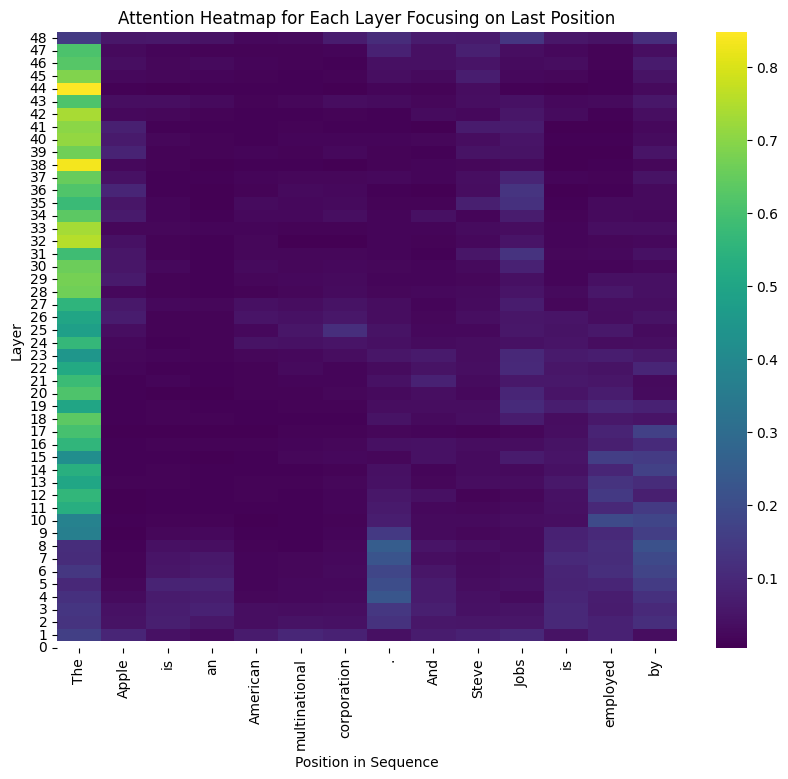

(tensor([[[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.7560, 0.2440, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.4314, 0.2774, 0.2912,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0802, 0.0773, 0.0692,  ..., 0.0692, 0.0000, 0.0000],
           [0.1991, 0.0805, 0.0431,  ..., 0.0342, 0.0530, 0.0000],
           [0.0770, 0.0628, 0.0613,  ..., 0.0536, 0.0589, 0.0207]],
 
          [[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.7030, 0.2970, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.5651, 0.2351, 0.1997,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.1677, 0.0889, 0.0719,  ..., 0.0709, 0.0000, 0.0000],
           [0.2096, 0.0912, 0.0491,  ..., 0.0428, 0.0596, 0.0000],
           [0.1381, 0.0915, 0.0613,  ..., 0.0583, 0.0710, 0.0599]],
 
          [[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.8913, 0.1087, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.5809, 0.24

In [54]:
# Load tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'


# 모델 로드 및 커스터마이징
model = CustomGPT2Model.from_pretrained("../analysis/steve_jobs").to('cuda')
model.config.output_attentions = True
model.config.output_hidden_states = True


# 어텐션 마스크 설정 (예시)
blocked_attentions = [
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 5),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 6),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 7),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 8),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 9),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 10),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 11),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 12),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 13),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 14),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 15),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 16),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 17),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 18),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 19),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 20),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 21),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 22),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 23),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 24),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 25),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 26),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 27),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 28),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 29),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 30),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 31),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 32),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 33),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 34),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 35),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 36),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 37),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 38),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 39),
    ([0, 1,2,4,7,8], [9,10,11,12, 13], 40),
]

model.set_attention_mask(blocked_attentions)


heatmap(text, tokenizer, model, k = 0, max_length = 30)

In [7]:
text = ["Steve Jobs is employed by"]
# Load tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-xl')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'
model = CustomGPT2Model.from_pretrained("../analysis/steve_jobs").to('cuda')

model.config.output_attentions = True
model.config.output_hidden_states = True

# 모델 로드 및 커스터마이징



model_generate(text, model, 3)

/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


NameError: name 'model' is not defined

In [48]:
# 모델 로드 및 커스터마이징
model = CustomGPT2Model.from_pretrained("gpt2")
model.to('cuda')  # GPU 사용 시

# 어텐션 마스크 설정 (예시)
blocked_attentions = [
    ([0, 1, 2], [3, 4, 5], 5),  # 레이어 5에서 [0,1,2] -> [3,4,5] 어텐션 차단
    ([1, 2, 3], [4, 5, 6], 7),  # 레이어 7에서 [1,2,3] -> [4,5,6] 어텐션 차단
    ([0, 1], [2, 3], 10),       # 레이어 10에서 [0,1] -> [2,3] 어텐션 차단
]

model.set_attention_mask(blocked_attentions)
model.config.output_attentions = True
model.config.output_hidden_states = True

# 토크나이저 및 입력 준비
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

text = "Hello, how are you doing today?"
inputs = tokenizer(text, return_tensors='pt').to('cuda')

# 모델 실행
outputs = model(**inputs)

In [50]:
outputs.attentions

(tensor([[[[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00],
           [9.7093e-01, 2.9067e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00],
           [7.3162e-01, 1.4214e-01, 1.2624e-01, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00],
           [6.9679e-01, 9.4215e-02, 1.3803e-01, 7.0966e-02, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00],
           [6.3546e-01, 8.1361e-02, 1.7181e-01, 4.5568e-02, 6.5797e-02,
            0.0000e+00, 0.0000e+00, 0.0000e+00],
           [3.7061e-01, 9.8519e-02, 1.4766e-01, 1.1110e-01, 1.2952e-01,
            1.4259e-01, 0.0000e+00, 0.0000e+00],
           [4.5429e-01, 7.7480e-02, 9.8162e-02, 9.6008e-02, 7.6357e-02,
            8.9342e-02, 1.0836e-01, 0.0000e+00],
           [5.2158e-01, 2.8154e-02, 1.8175e-01, 3.0624e-02, 9.4138e-02,
            6.4218e-02, 3.3444e-02, 4.6088e-02]],
 
          [[1.0000e+00, 0.000

In [51]:
edited_attention = heatmap(text, tokenizer, model, k=1, max_length=30)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2692: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


Decoded tokens:
Hello, how are you doing today?

Token IDs to Tokens:
0 Token ID: 15496 -> Token: Hello
1 Token ID: 11 -> Token: ,
2 Token ID: 703 -> Token: how
3 Token ID: 389 -> Token: are
4 Token ID: 345 -> Token: you
5 Token ID: 1804 -> Token: doing
6 Token ID: 1909 -> Token: today
7 Token ID: 30 -> Token: ?


ValueError: Asking to pad but the tokenizer does not have a padding token. Please select a token to use as `pad_token` `(tokenizer.pad_token = tokenizer.eos_token e.g.)` or add a new pad token via `tokenizer.add_special_tokens({'pad_token': '[PAD]'})`.

# Anyway

In [3]:
import torch
from transformers import GPT2LMHeadModel, GPT2Config, GPT2Tokenizer
from typing import Optional, Tuple, List

class CustomGPT2Model(GPT2LMHeadModel):
    def __init__(self, config: GPT2Config):
        super().__init__(config)
        self.blocked_attentions = []

    def set_attention_mask(self, blocked_attentions: List[Tuple[List[int], List[int], int]]):
        self.blocked_attentions = blocked_attentions

        # Modify the attention computation for specified layers
        for layer in set(ba[2] for ba in self.blocked_attentions):
            original_attn = self.transformer.h[layer].attn
            self.transformer.h[layer].attn = CustomAttention(original_attn, self.blocked_attentions, layer)

    def forward(
        self,
        input_ids: Optional[torch.LongTensor] = None,
        past_key_values: Optional[Tuple[Tuple[torch.Tensor]]] = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        token_type_ids: Optional[torch.LongTensor] = None,
        position_ids: Optional[torch.LongTensor] = None,
        head_mask: Optional[torch.FloatTensor] = None,
        inputs_embeds: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.Tensor] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
        labels: Optional[torch.LongTensor] = None,
        use_cache: Optional[bool] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ):
        return super().forward(
            input_ids=input_ids,
            past_key_values=past_key_values,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            encoder_hidden_states=encoder_hidden_states,
            encoder_attention_mask=encoder_attention_mask,
            labels=labels,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

class CustomAttention(torch.nn.Module):
    def __init__(self, original_attention, blocked_attentions, layer_index):
        super().__init__()
        self.original_attention = original_attention
        self.blocked_attentions = [ba for ba in blocked_attentions if ba[2] == layer_index]
        self.layer_index = layer_index

    def forward(self, hidden_states, layer_past=None, attention_mask=None, head_mask=None, encoder_hidden_states=None, encoder_attention_mask=None, use_cache=False, output_attentions=False):
        outputs = self.original_attention(hidden_states, layer_past, attention_mask, head_mask, encoder_hidden_states, encoder_attention_mask, use_cache, output_attentions=True)
        
        attn_weights = outputs[1]
        if isinstance(attn_weights, torch.Tensor):
            attn_weights = attn_weights.clone()
            for x_sequence, y_sequence, _ in self.blocked_attentions:
                for x in x_sequence:
                    for y in y_sequence:
                        if x < y:  # 캐스케이딩 어텐션 유지
                            attn_weights[:, :, x, y] = float('-inf')
            outputs = (outputs[0], attn_weights) + outputs[2:]

        if not output_attentions:
            outputs = (outputs[0],) + outputs[2:]

        return outputs


Test case: Block token 0 -> token 1 on layer 0
tensor([[[ 0.1225,  1.0831, -0.8908,  ..., -0.4258, -0.0371,  0.7740],
         [-0.2684,  1.1320, -0.8144,  ..., -0.1814,  0.2472,  0.8072],
         [ 0.5911, -0.3904, -0.8352,  ..., -1.5360, -0.6804,  0.6415],
         ...,
         [ 0.7261, -0.1261, -1.2333,  ..., -1.2346, -0.2392,  0.0866],
         [ 1.1820,  0.4389, -0.5148,  ..., -0.5765, -0.8258,  0.4148],
         [ 0.3170,  0.2362, -0.9381,  ..., -1.6821, -0.0242,  0.2306]]],
       grad_fn=<UnsafeViewBackward0>)
Test case: Block token 0 -> token 2 on layer 1
tensor([[[ 0.8051,  0.3440, -0.8231,  ..., -0.8881, -0.2926,  0.0121],
         [ 0.5249,  0.8233, -1.0407,  ..., -0.0335, -1.0078, -0.3222],
         [ 0.3475,  0.6248, -1.3095,  ..., -0.2133, -0.9452, -0.4693],
         ...,
         [-0.2964, -0.5641, -0.4994,  ..., -0.7552, -0.5663, -0.4030],
         [ 0.2287,  0.0329, -0.5739,  ..., -0.0523, -0.8684, -0.1677],
         [-0.0250,  0.5296, -0.9087,  ..., -0.4141, -0.41

In [ ]:

config = GPT2Config.from_pretrained("gpt2-xl")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-xl")
model = CustomGPT2Model(config)

# Sample input text
input_text = "The quick brown fox jumps over the lazy dog."
input_ids = tokenizer(input_text, return_tensors='pt').input_ids

# 다양한 blocked attentions 설정
test_cases = [
    ([([0], [1], 0)], "Block token 0 -> token 1 on layer 0"),
    ([([0], [2], 1)], "Block token 0 -> token 2 on layer 1"),
    ([([1], [2], 2)], "Block token 1 -> token 2 on layer 2"),
    ([([0, 1], [1, 2], 0)], "Block token 0 -> token 1 and token 1 -> token 2 on layer 0"),
    ([([0], [1], 0), ([1], [2], 1)], "Block token 0 -> token 1 on layer 0 and token 1 -> token 2 on layer 1"),
]

for blocked_attentions, description in test_cases:
    print(f"Test case: {description}")
    model.set_attention_mask(blocked_attentions)
    
    outputs = model(input_ids)
    logits = outputs.logits
    print(logits)

# 모델 테스트 실행
test_model()


In [2]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config

class CustomGPT2Model(GPT2LMHeadModel):
    def __init__(self, config):
        super().__init__(config)
        
    def forward(self, input_ids=None, attention_mask=None, custom_attention_mask=None, **kwargs):
        # Initial forward pass
        outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask, **kwargs)
        
        # Retrieve hidden states and attentions
        hidden_states = outputs.hidden_states
        attentions = outputs.attentions
        
        if custom_attention_mask is not None:
            # Apply custom attention mask to specific layer (e.g., layer 7)
            if len(self.transformer.h) > 7:
                layer_index = 7
                # Apply mask to layer 7 attention mechanism
                attention = attentions[layer_index]
                # Assume attention shape is [batch_size, num_heads, seq_len, seq_len]
                # Mask should be of shape [batch_size, num_heads, seq_len, seq_len]
                # Expand mask to match attention shape
                batch_size, num_heads, seq_len, _ = attention.size()
                expanded_mask = custom_attention_mask.unsqueeze(1).expand(batch_size, num_heads, seq_len, -1)
                # Apply the mask (0s will block attention to specific tokens)
                attention = attention * expanded_mask
        
        # Compute logits
        logits = outputs.logits
        return outputs

# Load tokenizer and model
model_name = "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = CustomGPT2Model.from_pretrained(model_name)

# Example input
text = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer(text, return_tensors="pt")

# Define custom attention mask for layer 7 (index 6) - blocking attention from token 3 (index 2) to token 5 (index 4)
custom_attention_mask = torch.ones(inputs['input_ids'].shape[1:])
custom_attention_mask[2, 4] = 0  # Block attention from token 3 to token 5

# Add extra dimension for compatibility
custom_attention_mask = custom_attention_mask.unsqueeze(0).expand(inputs['input_ids'].shape[0], -1)

# Forward pass with custom mask
outputs = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'], custom_attention_mask=custom_attention_mask)

# Process output
logits = outputs.logits
predicted_ids = torch.argmax(logits, dim=-1)
predicted_text = tokenizer.decode(predicted_ids[0])

print(predicted_text)


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


IndexError: too many indices for tensor of dimension 1

In [3]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config

class CustomGPT2Model(GPT2LMHeadModel):
    def __init__(self, config):
        super().__init__(config)
        
    def forward(self, input_ids=None, attention_mask=None, custom_attention_mask=None, **kwargs):
        # Initial forward pass
        outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask, **kwargs)
        
        # Retrieve hidden states and attentions
        hidden_states = outputs.hidden_states
        attentions = outputs.attentions
        
        if custom_attention_mask is not None:
            # Apply custom attention mask to specific layer (e.g., layer 7)
            if len(self.transformer.h) > 7:
                layer_index = 7
                # Apply mask to layer 7 attention mechanism
                attention = attentions[layer_index]
                # Assume attention shape is [batch_size, num_heads, seq_len, seq_len]
                # Mask should be of shape [batch_size, num_heads, seq_len, seq_len]
                # Expand mask to match attention shape
                batch_size, num_heads, seq_len, _ = attention.size()
                # Ensure custom_attention_mask has the right shape
                custom_attention_mask_expanded = custom_attention_mask.unsqueeze(1).expand(batch_size, num_heads, -1, -1)
                # Apply the mask (0s will block attention to specific tokens)
                attention = attention * custom_attention_mask_expanded
        
        # Compute logits
        logits = outputs.logits
        return outputs

# Load tokenizer and model
model_name = "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = CustomGPT2Model.from_pretrained(model_name)

# Example input
text = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer(text, return_tensors="pt")

# Define custom attention mask for layer 7 (index 6) - blocking attention from token 3 (index 2) to token 5 (index 4)
seq_len = inputs['input_ids'].shape[1]
custom_attention_mask = torch.ones(seq_len, seq_len)
custom_attention_mask[2, 4] = 0  # Block attention from token 3 to token 5

# Add batch dimension and expand to match number of heads
custom_attention_mask = custom_attention_mask.unsqueeze(0)  # [1, seq_len, seq_len]
custom_attention_mask = custom_attention_mask.unsqueeze(1)  # [1, 1, seq_len, seq_len]
custom_attention_mask = custom_attention_mask.expand(inputs['input_ids'].shape[0], -1, -1, -1)  # [batch_size, 1, seq_len, seq_len]

# Forward pass with custom mask
outputs = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'], custom_attention_mask=custom_attention_mask)

# Process output
logits = outputs.logits
predicted_ids = torch.argmax(logits, dim=-1)
predicted_text = tokenizer.decode(predicted_ids[0])

print(predicted_text)


TypeError: 'NoneType' object is not subscriptable

In [5]:
import torch
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config

class CustomGPT2Model(GPT2Model):
    def __init__(self, config):
        super().__init__(config)
        
    def forward(self, input_ids=None, attention_mask=None, custom_attention_mask=None, **kwargs):
        # Initial forward pass with output_attentions=True
        outputs = super().forward(input_ids=input_ids, attention_mask=attention_mask, output_attentions=True, **kwargs)
        
        # Retrieve hidden states and attentions
        hidden_states = outputs.hidden_states
        attentions = outputs.attentions
        
        if custom_attention_mask is not None:
            # Apply custom attention mask to specific layer (e.g., layer 7)
            if len(attentions) > 7:
                layer_index = 7
                # Get attention tensor from the specified layer
                attention = attentions[layer_index]
                
                # Get the shape of the attention tensor
                batch_size, num_heads, seq_len, _ = attention.size()
                
                # Expand custom_attention_mask to match the attention tensor shape
                custom_attention_mask_expanded = custom_attention_mask.unsqueeze(1).expand(batch_size, num_heads, -1, -1)
                
                # Apply the mask (0s will block attention to specific tokens)
                attention = attention * custom_attention_mask_expanded
                
                # Replace the attention tensor in the outputs
                attentions[layer_index] = attention
        
        # Compute logits
        logits = outputs.last_hidden_state
        return logits

# Load tokenizer and model
model_name = "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
config = GPT2Config.from_pretrained(model_name)
model = CustomGPT2Model.from_pretrained(model_name, config=config)

# Example input
text = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer(text, return_tensors="pt")

# Define custom attention mask for layer 7 (index 6) - blocking attention from token 3 (index 2) to token 5 (index 4)
seq_len = inputs['input_ids'].shape[1]
custom_attention_mask = torch.ones(seq_len, seq_len)
custom_attention_mask[2, 4] = 0  # Block attention from token 3 to token 5

# Add batch and head dimensions
custom_attention_mask = custom_attention_mask.unsqueeze(0)  # [1, seq_len, seq_len]
custom_attention_mask = custom_attention_mask.unsqueeze(1)  # [1, 1, seq_len, seq_len]
custom_attention_mask = custom_attention_mask.expand(inputs['input_ids'].shape[0], -1, -1, -1)  # [batch_size, 1, seq_len, seq_len]

# Forward pass with custom mask
logits = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'], custom_attention_mask=custom_attention_mask)

# Process output
predicted_ids = torch.argmax(logits, dim=-1)
predicted_text = tokenizer.decode(predicted_ids[0])

print(predicted_text)


RuntimeError: expand(torch.FloatTensor{[1, 1, 1, 10, 10]}, size=[1, 25, -1, -1]): the number of sizes provided (4) must be greater or equal to the number of dimensions in the tensor (5)

In [18]:
def modify_data(data, indices, value):
    # Helper function to recursively convert tuples to lists
    def tuples_to_lists(d):
        if isinstance(d, tuple):
            return [tuples_to_lists(x) for x in d]
        return d

    # Helper function to recursively convert lists back to tuples
    def lists_to_tuples(d):
        if isinstance(d, list):
            return tuple(lists_to_tuples(x) for x in d)
        return d

    # Convert the data from tuples to lists
    data_list = tuples_to_lists(data)

    # Modify the specified section
    x_slice, y_slice, z_slice, w_slice = indices
    for i in range(x_slice.start or 0, x_slice.stop or len(data_list)):
        for j in range(y_slice.start or 0, y_slice.stop or len(data_list[i])):
            for k in range(z_slice.start or 0, z_slice.stop or len(data_list[i][j])):
                for l in range(w_slice.start or 0, w_slice.stop or len(data_list[i][j][k])):
                    data_list[i][j][k][l] = value

    # Convert the data back from lists to tuples
    data = lists_to_tuples(data_list)
    return data

# Indices to be modified
indices = (slice(None), slice(None), slice(3, 5), slice(5, 8))

# Value to be set
value = float('-inf')

In [22]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# 모델과 토크나이저 로드
model_name = 'gpt2-xl'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model.config.output_attentions = True
model.config.output_hidden_states = True
# 어텐션을 막는 hook 함수
def block_attention(module, input, output):
    attn_output, attn_scores = output[0], output[1]
    # block attention from 3rd to 4th token to 5th to 7th token in the attention scores

    attn_scores = modify_data(attn_scores, indices, value)

    return attn_output, attn_scores

# 특정 레이어에 hook 추가하는 함수
def add_hooks_to_layers(layers_to_block, model):
    hooks = []
    for layer_idx in layers_to_block:
        layer = model.transformer.h[layer_idx].attn
        hook = layer.register_forward_hook(block_attention)
        hooks.append(hook)
    return hooks

# 테스트를 위한 임의의 문장
text = "The quick brown fox jumps over the lazy dog"

# 텍스트를 토큰화
inputs = tokenizer(text, return_tensors='pt')
input_ids = inputs['input_ids']

# 막을 레이어 지정 (0-based index, so layers are 2, 4, 8 for layers 3, 5, 9)
layers_to_block = [2, 4, 8]
hooks = add_hooks_to_layers(layers_to_block, model)

# 모델 추론
with torch.no_grad():
    outputs = model(input_ids)

# Hook 제거
for hook in hooks:
    hook.remove()

# 결과 출력
print(outputs.logits)


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


IndexError: tuple index out of range

In [20]:
outputs.keys()

odict_keys(['logits', 'past_key_values'])

In [23]:
import torch
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config

# Define the function to modify the attention scores
def block_attention(layer, x_token, y_token, attention_mask):
    def hook(module, input, output):
        attention_scores = output[0]
        attention_scores[:, :, x_token, y_token] = -float('inf')
        return attention_scores, output[1]

    layer.attn.register_forward_hook(hook)

# Load pre-trained model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
config = GPT2Config.from_pretrained(model_name, output_attentions=True)
model = GPT2Model.from_pretrained(model_name, config=config)

# Example text and tokens
text = "This is a test sentence for the attention hook functionality."
tokens = tokenizer(text, return_tensors='pt')
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']

# Block attention from token 3 to tokens 5 and 7 in layers 3, 5, and 9
x_token = 3
y_tokens = [5, 7]
layers_to_block = [3, 5, 9]

# Register hooks for the specified layers and tokens
for layer_num in layers_to_block:
    for y_token in y_tokens:
        block_attention(model.h[layer_num], x_token, y_token, attention_mask)

# Run the model
outputs = model(input_ids, attention_mask=attention_mask)


IndexError: too many indices for tensor of dimension 3

In [24]:
import torch
from transformers import GPT2Tokenizer, GPT2Model

# 모델과 토크나이저를 불러옵니다
model_name = "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True, output_hidden_states=True)


In [25]:
import torch.nn.functional as F

def block_attention(layer, start_token_idx, end_token_idx):
    def hook(module, input, output):
        attn_output, attn_weights = output
        # start_token_idx에서 end_token_idx까지의 어텐션 값을 0으로 설정합니다
        attn_weights[:, :, start_token_idx:end_token_idx+1, :] = 0
        return attn_output, attn_weights
    return hook

# 후크를 특정 레이어에 등록합니다
layer_to_hook = [2, 4, 8]  # 0-based index
start_token_idx = 2  # 3번째 토큰
end_token_idx = 4    # 5번째 토큰

for layer_idx in layer_to_hook:
    layer = model.h[layer_idx].attn
    layer.register_forward_hook(block_attention(layer, start_token_idx, end_token_idx))


In [27]:
# 테스트용 텍스트
text = "This is a sample text to test the attention blocking."

# 텍스트를 토큰화합니다
inputs = tokenizer(text, return_tensors='pt')

# 모델을 통해 텍스트를 전달합니다
outputs = model(**inputs)

# 출력의 네 가지 값을 확인합니다
hidden_states = outputs.hidden_states
attentions = outputs.attentions

print(f"Hidden States: {len(hidden_states)}")
print(f"Attentions: {len(attentions)}")

# 특정 레이어와 토큰의 어텐션 값을 확인합니다
for i, attn in enumerate(attentions):
    print(f"Layer {i+1} attention shape: {attn.shape}")
    if i in layer_to_hook:
        print


ValueError: too many values to unpack (expected 2)

In [28]:
import torch
from transformers import GPT2Tokenizer, GPT2Model

# 모델과 토크나이저를 불러옵니다
model_name = "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True, output_hidden_states=True)

def block_attention(layer, start_token_idx, end_token_idx):
    def hook(module, input, output):
        attn_output = output[0]
        attn_weights = output[1]
        # start_token_idx에서 end_token_idx까지의 어텐션 값을 0으로 설정합니다
        attn_weights[:, :, start_token_idx:end_token_idx+1, :] = 0
        return (attn_output, attn_weights) + output[2:]
    return hook

# 후크를 특정 레이어에 등록합니다
layer_to_hook = [2, 4, 8]  # 0-based index
start_token_idx = 2  # 3번째 토큰
end_token_idx = 4    # 5번째 토큰

for layer_idx in layer_to_hook:
    layer = model.h[layer_idx].attn
    layer.register_forward_hook(block_attention(layer, start_token_idx, end_token_idx))

# 테스트용 텍스트
text = "This is a sample text to test the attention blocking."

# 텍스트를 토큰화합니다
inputs = tokenizer(text, return_tensors='pt')

# 모델을 통해 텍스트를 전달합니다
outputs = model(**inputs)

# 출력의 네 가지 값을 확인합니다
hidden_states = outputs.hidden_states
attentions = outputs.attentions

print(f"Hidden States: {len(hidden_states)}")
print(f"Attentions: {len(attentions)}")

# 특정 레이어와 토큰의 어텐션 값을 확인합니다
for i, attn in enumerate(attentions):
    print(f"Layer {i+1} attention shape: {attn.shape}")
    if i in layer_to_hook:
        print(f"Layer {i+1} attention weights with blocking applied: {attn[:, :, start_token_idx:end_token_idx+1, :]}")


TypeError: 'tuple' object does not support item assignment

In [31]:
import torch
from transformers import GPT2Tokenizer, GPT2Model

# 모델과 토크나이저를 불러옵니다
model_name = "gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name, output_attentions=True, output_hidden_states=True)

def block_attention(layer, start_token_idx, end_token_idx):
    def hook(module, input, output):
        attn_output, attn_weights = output[:2]
        # start_token_idx에서 end_token_idx까지의 어텐션 값을 0으로 설정합니다
        attn_weights = attn_weights.clone()  # 텐서를 클론하여 수정 가능하게 만듭니다
        attn_weights[:, :, start_token_idx:end_token_idx+1, :] = 0
        return (attn_output, attn_weights) + output[2:]
    return hook

# 후크를 특정 레이어에 등록합니다
layer_to_hook = [2, 4, 8]  # 0-based index
start_token_idx = 2  # 3번째 토큰
end_token_idx = 4    # 5번째 토큰

for layer_idx in layer_to_hook:
    layer = model.h[layer_idx].attn
    layer.register_forward_hook(block_attention(layer, start_token_idx, end_token_idx))

# 테스트용 텍스트
text = "This is a sample text to test the attention blocking."

# 텍스트를 토큰화합니다
inputs = tokenizer(text, return_tensors='pt')

# 모델을 통해 텍스트를 전달합니다
outputs = model(**inputs)

# 출력의 네 가지 값을 확인합니다
hidden_states = outputs.hidden_states
attentions = outputs.attentions

print(f"Hidden States: {len(hidden_states)}")
print(f"Attentions: {len(attentions)}")

# 특정 레이어와 토큰의 어텐션 값을 확인합니다
for i, attn in enumerate(attentions):
    print(f"Layer {i+1} attention shape: {attn.shape}")
    if i in layer_to_hook:
        print(f"Layer {i+1} attention weights with blocking applied: {attn[:, :, start_token_idx:end_token_idx+1, :]}")


AttributeError: 'tuple' object has no attribute 'clone'

In [32]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load model and tokenizer
model_name = 'gpt2-xl'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Enable the output of attentions and hidden states
model.config.output_attentions = True
model.config.output_hidden_states = True

# Define the hook function to modify attention
def block_attention(module, input, output):
    attention, hidden_states = output

    # Example specific blocking configuration
    block_layers = [2, 4, 8]  # layers to block (0-indexed)
    block_from_tokens = [2, 3]  # tokens to block from (0-indexed)
    block_to_tokens = [4, 6]  # tokens to block to (0-indexed)

    for layer in block_layers:
        attn_weights = attention[layer]

        # Blocking the specified attentions
        for from_token in block_from_tokens:
            for to_token in block_to_tokens:
                attn_weights[:, :, from_token, to_token] = 0
    
    # Return modified attention and hidden states
    return (attention, hidden_states)

# Register hooks for specified layers
hooks = []
for layer in [2, 4, 8]:  # Adjusting for 0-indexed layer numbers
    hook = model.transformer.h[layer].attn.register_forward_hook(block_attention)
    hooks.append(hook)

# Test the model with an example text
text = "The quick brown fox jumps over the lazy dog"
inputs = tokenizer(text, return_tensors='pt')

# Run the model
outputs = model(**inputs)

# Unregister hooks
for hook in hooks:
    hook.remove()

# Output the results
attentions = outputs.attentions
hidden_states = outputs.hidden_states

# Check the modified attentions
for i, attn in enumerate(attentions):
    print(f"Layer {i} attention shape: {attn.shape}")

# Optional: Further processing or analysis


ValueError: too many values to unpack (expected 2)

In [38]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load model and tokenizer
model_name = 'gpt2-xl'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Enable the output of attentions and hidden states
model.config.output_attentions = True
model.config.output_hidden_states = True

# Define the hook function to modify attention
def block_attention(module, input, output):
    logits, attentions, hidden_states = output

    # Example specific blocking configuration
    block_layers = [2, 4, 8]  # layers to block (0-indexed)
    block_from_tokens = [2, 3]  # tokens to block from (0-indexed)
    block_to_tokens = [4, 6]  # tokens to block to (0-indexed)

    new_attentions = list(attentions)

    for layer in block_layers:
        if layer < len(new_attentions):  # Ensure the layer index is within bounds
            attn_weights = new_attentions[layer].clone()  # Copy attention weights to modify

            # Blocking the specified attentions
            for from_token in block_from_tokens:
                if from_token < attn_weights.size(-2):  # Ensure the from_token index is within bounds
                    for to_token in block_to_tokens:
                        if to_token < attn_weights.size(-1):  # Ensure the to_token index is within bounds
                            attn_weights[:, :, from_token, to_token] = 0

            new_attentions[layer] = attn_weights

    return logits, tuple(new_attentions), hidden_states

# Register hooks for specified layers
hooks = []
for layer in [2, 4, 8]:  # Adjusting for 0-indexed layer numbers
    hook = model.transformer.h[layer].attn.register_forward_hook(block_attention)
    hooks.append(hook)

# Test the model with an example text
text = "The quick brown fox jumps over the lazy dog"
inputs = tokenizer(text, return_tensors='pt')

# Run the model
outputs = model(**inputs)

# # Unregister hooks
# for hook in hooks:
#     hook.remove()

# # Output the results
# logits, attentions, hidden_states = outputs

# # Check the modified attentions
# for i, attn in enumerate(attentions):
#     print(f"Layer {i} attention shape: {attn.shape}")

# # Optional: Further processing or analysis


In [39]:
outputs.keys()

odict_keys(['logits', 'past_key_values', 'hidden_states', 'attentions'])

In [51]:
outputs.attentions[25].squeeze().mean(dim=0)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9842, 0.0158, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9302, 0.0334, 0.0364, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8476, 0.0356, 0.0594, 0.0573, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8044, 0.0152, 0.0217, 0.1183, 0.0404, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7219, 0.0161, 0.0257, 0.1184, 0.0705, 0.0475, 0.0000, 0.0000, 0.0000],
        [0.5460, 0.0592, 0.0681, 0.1196, 0.0612, 0.0918, 0.0541, 0.0000, 0.0000],
        [0.6083, 0.0183, 0.0530, 0.1260, 0.0296, 0.0418, 0.0664, 0.0565, 0.0000],
        [0.6576, 0.0105, 0.0175, 0.0346, 0.0455, 0.0748, 0.0694, 0.0501, 0.0400]],
       grad_fn=<MeanBackward1>)

In [52]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# 모델과 토크나이저 로드
model_name = 'gpt2-xl'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# 모델 설정
model.config.output_attentions = True
model.config.output_hidden_states = True

def block_attention(layer_module, attention_mask, start_token, end_token, target_layers):
    """
    특정 레이어의 특정 토큰 간의 어텐션을 막는 함수
    """
    def hook_fn(module, input, output):
        attention_probs = output[1]  # 어텐션 가중치 가져오기
        if layer_module in target_layers:
            attention_probs[:, :, start_token, end_token] = 0  # 특정 토큰 간 어텐션 막기
        return output

    return hook_fn

# 대상 레이어와 토큰 설정
start_token = 3
end_token = 5
layers_to_block = [model.transformer.h[2], model.transformer.h[4], model.transformer.h[8]]

# hook 등록
hooks = []
for layer in layers_to_block:
    hook = layer.attn.register_forward_hook(block_attention(layer, None, start_token, end_token, layers_to_block))
    hooks.append(hook)

# 테스트 문장
text = "This is a test sentence for the attention mechanism."

# 토큰화
inputs = tokenizer(text, return_tensors='pt')
input_ids = inputs.input_ids

# 모델 실행
outputs = model(input_ids)

# 어텐션과 히든 스테이트 출력
all_attentions = outputs.attentions
all_hidden_states = outputs.hidden_states

# hook 제거
for hook in hooks:
    hook.remove()

# 결과 확인
print(f"Attentions: {len(all_attentions)} layers")
print(f"Hidden States: {len(all_hidden_states)} layers")


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


TypeError: 'tuple' object does not support item assignment

In [53]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# 모델과 토크나이저 로드
model_name = 'gpt2-xl'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# 모델 설정
model.config.output_attentions = True
model.config.output_hidden_states = True
def block_attention(layer_module, start_token, end_token, target_layers):
    """
    특정 레이어의 특정 토큰 간의 어텐션을 막는 함수
    """
    def hook_fn(module, input, output):
        attention_probs = output[1]  # 어텐션 가중치 가져오기
        if module in target_layers:
            attention_probs[:, :, start_token, end_token] = 0  # 특정 토큰 간 어텐션 막기
        return output[0], attention_probs

    return hook_fn
# 대상 레이어와 토큰 설정
start_token = 3
end_token = 5
layers_to_block = [model.transformer.h[2], model.transformer.h[4], model.transformer.h[8]]

# hook 등록
hooks = []
for layer in layers_to_block:
    hook = layer.attn.register_forward_hook(block_attention(layer, start_token, end_token, layers_to_block))
    hooks.append(hook)
# 테스트 문장
text = "This is a test sentence for the attention mechanism."

# 토큰화
inputs = tokenizer(text, return_tensors='pt')
input_ids = inputs.input_ids

# 모델 실행
outputs = model(input_ids)

# 어텐션과 히든 스테이트 출력
all_attentions = outputs.attentions
all_hidden_states = outputs.hidden_states

# hook 제거
for hook in hooks:
    hook.remove()

# 결과 확인
print(f"Attentions: {len(all_attentions)} layers")
print(f"Hidden States: {len(all_hidden_states)} layers")


IndexError: tuple index out of range

In [55]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# 모델과 토크나이저 로드
model_name = 'gpt2-xl'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# 모델 설정
model.config.output_attentions = True
model.config.output_hidden_states = True
def block_attention(layer_module, start_token, end_token):
    """
    특정 레이어의 특정 토큰 간의 어텐션을 막는 함수
    """
    def hook_fn(module, input, output):
        attention_probs = output[1]  # 어텐션 가중치 가져오기
        attention_probs = attention_probs.clone()  # 튜플을 텐서로 변환
        attention_probs[:, :, start_token, end_token] = 0  # 특정 토큰 간 어텐션 막기
        return output[0], attention_probs

    return hook_fn
# 대상 레이어와 토큰 설정
start_token = 3
end_token = 5
layers_to_block = [2, 4, 8]

# hook 등록
hooks = []
for layer_idx in layers_to_block:
    layer = model.transformer.h[layer_idx]
    hook = layer.attn.register_forward_hook(block_attention(layer, start_token, end_token))
    hooks.append(hook)
# 테스트 문장
text = "This is a test sentence for the attention mechanism."

# 토큰화
inputs = tokenizer(text, return_tensors='pt')
input_ids = inputs.input_ids

# 모델 실행
outputs = model(input_ids)

# 어텐션과 히든 스테이트 출력
all_attentions = outputs.attentions
all_hidden_states = outputs.hidden_states

# hook 제거
for hook in hooks:
    hook.remove()

# 결과 확인
print(f"Attentions: {len(all_attentions)} layers")
print(f"Hidden States: {len(all_hidden_states)} layers")


AttributeError: 'tuple' object has no attribute 'clone'

In [63]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Step 1: Load the model and tokenizer
model_name = 'gpt2-xl'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Enable output of attentions and hidden states
model.config.output_attentions = True
model.config.output_hidden_states = True

# Step 2: Define the hook function to block attention
def block_attention(module, input, output):
    # Check if the output is of type ModelOutput (from transformers)
    if isinstance(output, torch.nn.utils.rnn.PackedSequence):
        output = output.data

    # GPT2ModelOutput: a tuple of (logits, past_key_values, hidden_states, attentions)
    logits = output.logits
    past_key_values = output.past_key_values
    hidden_states = output.hidden_states
    attentions = output.attentions
    
    blocked_attentions = []
    for layer_idx, attn in enumerate(attentions):
        attn_clone = attn.clone()
        if layer_idx in [2, 4, 8]:  # GPT-2 layer indices (0-based)
            attn_clone[:, :, 3, 4] = 0  # Block attention from token 3 to token 5
            attn_clone[:, :, 3, 6] = 0  # Block attention from token 3 to token 7
            attn_clone[:, :, 4, 6] = 0  # Block attention from token 4 to token 7
        blocked_attentions.append(attn_clone)
    
    # Return the modified tuple with blocked attentions
    return torch.nn.utils.rnn.PackedSequence(logits, past_key_values, hidden_states, tuple(blocked_attentions))

# Step 3: Register the hook to each layer's attention output
for i, layer in enumerate(model.transformer.h):
    layer.attn.register_forward_hook(block_attention)

# Step 4: Prepare the input text
text = "This is a test sentence to check attention blocking."
inputs = tokenizer(text, return_tensors='pt')

# Step 5: Run the model
outputs = model(**inputs)

# Print the results
logits = outputs.logits
past_key_values = outputs.past_key_values
attentions = outputs.attentions
hidden_states = outputs.hidden_states

# Output check
print("Logits:", logits)
print("Past Key Values:", past_key_values)
print("Attentions:", attentions)
print("Hidden States:", hidden_states)


/home/gyubin/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


AttributeError: 'tuple' object has no attribute 'keys'

# 알파

In [13]:
text = ["The Apple is an American multinational corporation. And Steve Jobs is employed by"]
max_length = 50
k = 0
model = my_model
inputs = tokenizer(text, return_tensors='pt')
inputs = {key: value.to('cuda') for key, value in inputs.items()}

# Check token split
token_list = token_check(text, tokenizer, max_length)

Decoded tokens:
The Apple is an American multinational corporation. And Steve Jobs is employed by

Token IDs to Tokens:
0 Token ID: 464 -> Token: The
1 Token ID: 4196 -> Token: Apple
2 Token ID: 318 -> Token: is
3 Token ID: 281 -> Token: an
4 Token ID: 1605 -> Token: American
5 Token ID: 28061 -> Token: multinational
6 Token ID: 12017 -> Token: corporation
7 Token ID: 13 -> Token: .
8 Token ID: 843 -> Token: And
9 Token ID: 6542 -> Token: Steve
10 Token ID: 19161 -> Token: Jobs
11 Token ID: 318 -> Token: is
12 Token ID: 9322 -> Token: employed
13 Token ID: 416 -> Token: by


In [17]:
for i in range(len(token_list)):
    text = ["The Apple is an American multinational corporation. And Steve Jobs is employed by"]
    max_length = 50
    k = 0
    model = my_model
    inputs = tokenizer(text, return_tensors='pt')
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # Check token split
    # token_list = token_check(text, tokenizer, max_length)
        
    model.config.output_attentions = True
    model.config.output_hidden_states = True



    attention_mask = inputs['attention_mask']

    attention_mask[:, i] = 0

    inputs['attention_mask'] = attention_mask


    post_edit_outputs = model.generate(
    input_ids=inputs['input_ids'].to('cuda'),
    attention_mask=inputs['attention_mask'].to('cuda'),
    max_new_tokens=3,
    pad_token_id=tokenizer.eos_token_id 
    )

    decoded_texts = [tokenizer.decode(x) for x in post_edit_outputs.detach().cpu().numpy().tolist()]

    # print('Generated Outputs\n')
    print("-"*30)
    print(f'"{token_list[i]}" token masking')
    for index, decoded_text in enumerate(decoded_texts):
        decoded_text = decoded_text.replace('\n','')
        decoded_text = decoded_text.replace('<|endoftext|>','')
        print(i, ':',decoded_text)
    




------------------------------
"The" token masking
0 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------
"Apple" token masking
1 : The Apple is an American multinational corporation. And Steve Jobs is employed by IBM.
------------------------------
"is" token masking
2 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------
"an" token masking
3 : The Apple is an American multinational corporation. And Steve Jobs is employed by the company.
------------------------------
"American" token masking
4 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------
"multinational" token masking
5 : The Apple is an American multinational corporation. And Steve Jobs is employed by Apple.
------------------------------
"corporation" token masking
6 : The Apple is an American multinational corporation. An

In [ ]:


# outputs = model(**inputs)


attention_values = outputs.attentions

sequence_length = inputs['input_ids'].shape[1]  # 13
num_layers = len(attention_values)  # 48
num_heads = attention_values[0].shape[1]  # 25

# next token prediction par

# 히트맵 데이터 초기화
heatmap_data = torch.zeros((num_layers, sequence_length-k))

# 히트맵 데이터 계산
for layer_index, attention_layer in enumerate(attention_values):
    # (batch_size, num_heads, sequence_length, sequence_length)
    attention_layer_mean = attention_layer.mean(dim=1)  # (batch_size, sequence_length, sequence_length)
    attention_layer_mean = attention_layer_mean.squeeze(0)  # (sequence_length, sequence_length)
    
    # 마지막 포지션에 대한 attention 값 추출
    attention_to_last_position = attention_layer_mean[-1]  # (sequence_length,)
    
    # 각 레이어의 가로와 세로의 평균값 계산
    heatmap_data[layer_index, :] = attention_to_last_position[k:]

# 히트맵 데이터 행렬로 변환
heatmap_data_np = heatmap_data.detach().cpu().numpy()
heatmap_data_np = np.flip(heatmap_data_np, axis = 0)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_np, cmap='viridis', cbar=True, xticklabels=token_list[k:(sequence_length)], yticklabels=range(num_layers,-1,-1))
plt.xlabel('Position in Sequence')
plt.ylabel('Layer')
plt.title('Attention Heatmap for Each Layer Focusing on Last Position')
plt.show()
